<a href="https://colab.research.google.com/github/arthik1699/DATA690_Data_Visulaization_Statistics/blob/main/Assignment_05/Assignment05_Part03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data690 - Data Visualization & Statistics
## Assignment- 5

* Name - Arthi Komma
* Campus id - GF89659

## Part 3 - Jupyter Notebooks


## What is Jupyter Notebook and what is it used for?

The Jupyter Notebook is an open-source web application that allows data scientists to create and share documents that integrate live code, equations, computational output, visualizations, and other multimedia resources, along with explanatory text in a single document.

## Everything in a cell

Jupyter notebooks are organized as a set of "cells". Each cell can contain different types of content (markdown text, Python code, R code, etc.) The current  cell containing text is a markdown cell, cells with code are code cells, as displayed below.

In [ ]:
7 * 8

56

 ## **Command Mode**

- shift + enter - run cell, select below
- ctrl + enter - run cell
- option + enter - run cell, insert below
- ctrl+A - insert cell above
- ctrl+B - insert cell below
- ctrl+C - copy cell
- ctrl+V - paste cell
- ctrl+D - D delete selected cell
- ctrl+ shift + M - merge selected cells, or current cell with cell below if only one cell selected
- ctrl+I - I interrupt kernel
- ctrl+0  - 0 restart kernel (with dialog)
- ctrl+ Y - change cell to code mode
- ctrl+M - change cell to markdown mode (good for documentation)

## Working with code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500,6), 0)

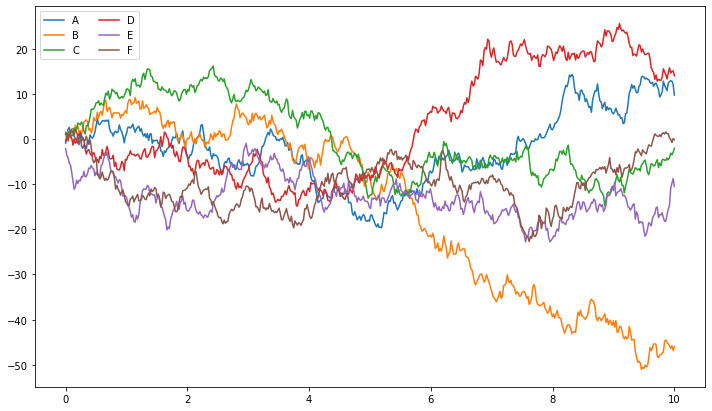

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(x,y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

## Interacting with data

In [ ]:
import requests
import pandas as pd

In [ ]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [ ]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-02-27 02:26:52.367376')

In [ ]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)


In [ ]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)


## Bitcoin:

In [ ]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-02-27 03:00:00,38246.62,38593.29,38218.11,38572.65,15.473687,5.940543e+05
2022-02-27 04:00:00,38568.58,38714.84,38557.26,38637.49,18.114466,7.001259e+05
2022-02-27 05:00:00,38637.15,38694.83,38500.56,38593.13,10.271630,3.965473e+05
2022-02-27 06:00:00,38579.76,38772.01,38482.91,38620.12,14.831298,5.736353e+05
2022-02-27 07:00:00,38648.04,38888.88,38646.67,38814.82,27.119317,1.051880e+06


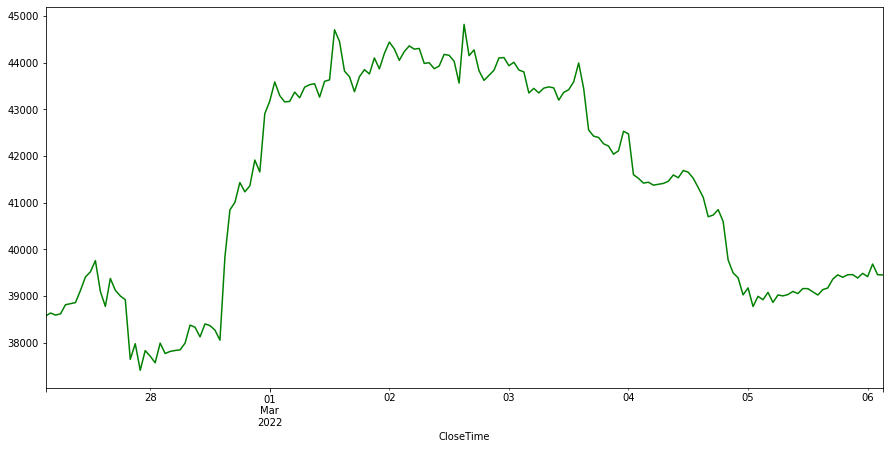

In [ ]:
btc['ClosePrice'].plot(figsize=(15,7), color='green')

## Ether:

In [ ]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-02-27 03:00:00,2681.25,2714.60,2678.04,2712.10,153.019514,4.123667e+05
2022-02-27 04:00:00,2711.26,2729.59,2711.26,2720.40,276.287461,7.512221e+05
2022-02-27 05:00:00,2714.18,2721.75,2703.00,2707.97,82.094881,2.226362e+05
2022-02-27 06:00:00,2708.16,2723.26,2699.81,2714.03,80.871043,2.195674e+05
2022-02-27 07:00:00,2710.55,2737.77,2710.55,2734.87,729.171686,1.986249e+06


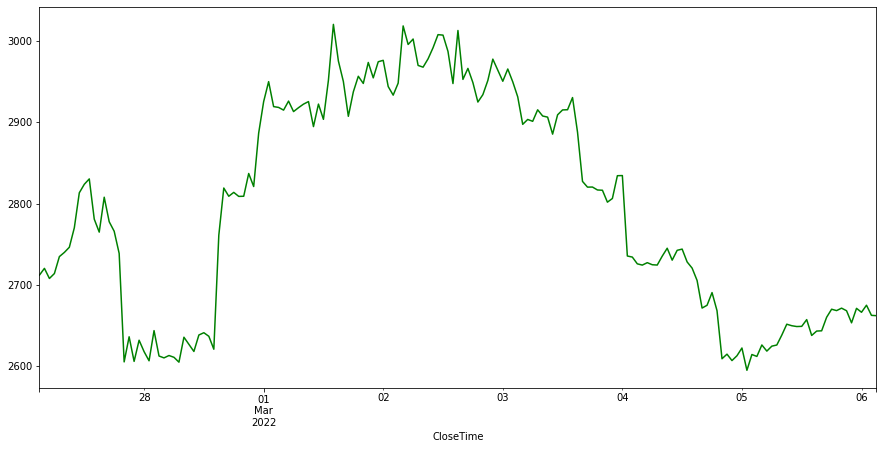

In [ ]:
eth['ClosePrice'].plot(figsize=(15, 7),color='green')


In [ ]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-02-27 03:00:00,2681.25,2714.60,2678.04,2712.10,153.019514,4.123667e+05
2022-02-27 04:00:00,2711.26,2729.59,2711.26,2720.40,276.287461,7.512221e+05
2022-02-27 05:00:00,2714.18,2721.75,2703.00,2707.97,82.094881,2.226362e+05
2022-02-27 06:00:00,2708.16,2723.26,2699.81,2714.03,80.871043,2.195674e+05
2022-02-27 07:00:00,2710.55,2737.77,2710.55,2734.87,729.171686,1.986249e+06


## Bonus: Dynamic plots with Bokeh

In [ ]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [ ]:
output_notebook()

In [ ]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

## Exporting to Excel

In [ ]:
writer = pd.ExcelWriter('cryptos.xlsx')

In [ ]:
btc.to_excel(writer, sheet_name='Bitcoin')


In [ ]:
eth.to_excel(writer, sheet_name='Ether')

In [ ]:
writer.save()